# **K-Means Clustering Algorithm from Scratch**

In this notebook, we will develop a K-Means clustering algorithm from scratch using Python libraries such as NumPy, Pandas, Matplotlib, and scikit-learn. The K-Means algorithm is a popular method for partitioning data into distinct groups (clusters) based on feature similarities.


Nojood Alnahdi

#Importing Libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import f1_score, normalized_mutual_info_score, rand_score

#Generating Datasets
We will generate four different datasets to test the K-Means algorithm:

In [28]:
# Set parameters for dataset generation
sample_count = 300
seed = 65

**1- Blobs Dataset**
This dataset consists of isotropic Gaussian blobs for clustering. It is useful for evaluating the clustering performance due to its well-separated clusters.

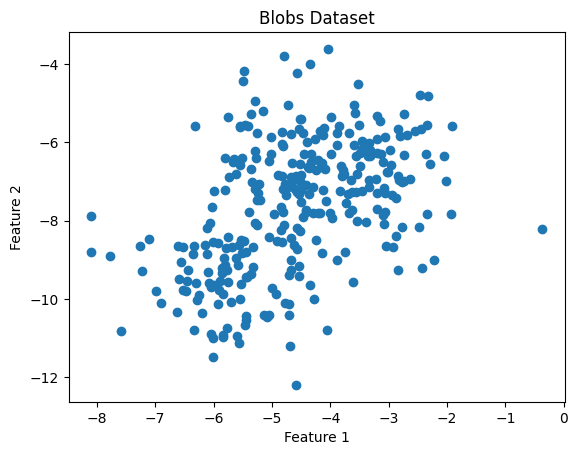

In [29]:
# Dataset 1: Blobs
data1, labels1 = make_blobs(n_samples=sample_count, random_state=seed)
plt.scatter(data1[:, 0], data1[:, 1])
plt.title("Blobs Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**2- Anisotropicly Distributed Dataset**
This dataset is generated by applying a linear transformation to the blobs, resulting in an elongated shape. This tests the algorithm’s ability to cluster non-spherical shapes.

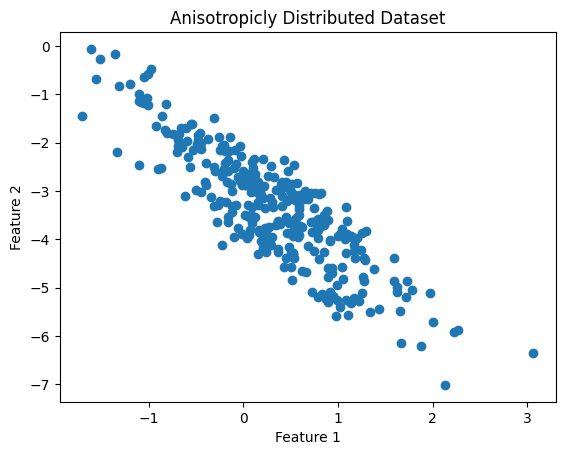

In [30]:
# Dataset 2: Anisotropically distributed dataset
data2, labels2 = make_blobs(n_samples=sample_count, random_state=seed)
transformation_matrix = [[0.6, -0.6], [-0.4, 0.8]]
data2 = np.dot(data2, transformation_matrix)
plt.scatter(data2[:, 0], data2[:, 1])
plt.title("Anisotropicly Distributed Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**3- Noisy Moons Dataset**
This dataset consists of two interleaving half circles. It is more challenging due to the noise added to the data points.

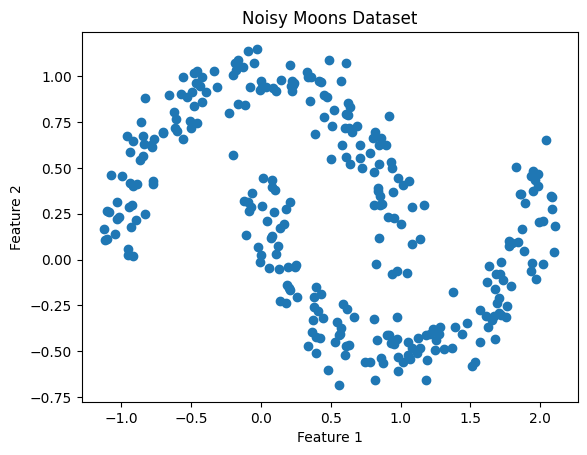

In [31]:
# Dataset 3: Noisy moons dataset
data3, labels3 = make_moons(n_samples=sample_count, noise=0.1, random_state=seed)
plt.scatter(data3[:, 0], data3[:, 1])
plt.title("Noisy Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**4- Noisy Circles Dataset**
This dataset contains two concentric circles, posing another challenge for the clustering algorithm because of the circular structure of the data.

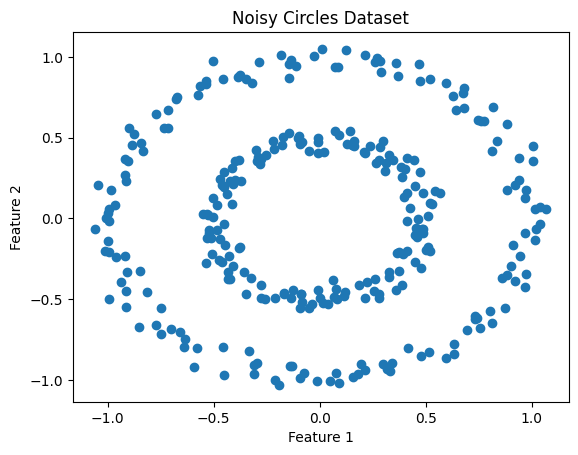

In [32]:
# Dataset 4: Noisy circles dataset
data4, labels4 = make_circles(n_samples=sample_count, factor=0.5, noise=0.05, random_state=seed)
plt.scatter(data4[:, 0], data4[:, 1])
plt.title("Noisy Circles Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [33]:
# Sample Data
print(data1[30:35])

[[-5.26904011 -6.40579446]
 [-3.48500593 -6.59876117]
 [-5.487523   -4.44427723]
 [-4.06584836 -7.50190732]
 [-4.52405059 -6.98303597]]



# Implementing K-Means Algorithm
we will define the K-Means class that implements the clustering algorithm. The class will include methods for initialization, cluster assignment, centroid updating, and visualization.

**Explanation of the Class Methods**

- Initialization: Sets the number of clusters and other parameters.
- _initialize_centroids: Randomly selects initial centroids from the dataset.
- _assign_clusters: Assigns each data point to the nearest centroid.
- _update_centroids: Recalculates centroids based on assigned data points.
- _predict: Outputs the final cluster assignments.
- _plot: Visualizes the clustering results.
- fit: Executes the K-Means algorithm.

In [34]:
class KMeans:
    def __init__(self, data, num_clusters):
        self.num_clusters = num_clusters
        self.max_iter = 100
        self.num_samples, self.num_features = data.shape
        self.show_plot = True

    def _initialize_centroids(self, data):
        centroids = np.zeros((self.num_clusters, self.num_features))
        for i in range(self.num_clusters):
            random_sample = data[np.random.choice(range(self.num_samples))]
            centroids[i] = random_sample
        return centroids

    def _assign_clusters(self, data, centroids):
        clusters = [[] for _ in range(self.num_clusters)]
        for idx, sample in enumerate(data):
            closest_centroid_idx = np.argmin(
                np.sqrt(np.sum((sample - centroids) ** 2, axis=1))
            )
            clusters[closest_centroid_idx].append(idx)
        return clusters

    def _update_centroids(self, clusters, data):
        centroids = np.zeros((self.num_clusters, self.num_features))
        for idx, cluster in enumerate(clusters):
            if cluster:  # Avoid empty clusters
                new_centroid = np.mean(data[cluster], axis=0)
                centroids[idx] = new_centroid
        return centroids

    def _predict(self, clusters, data):
        predictions = np.zeros(self.num_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                predictions[sample_idx] = cluster_idx
        return predictions

    def _plot(self, data, predictions):
        plt.scatter(data[:, 0], data[:, 1], c=predictions)
        plt.title("K-means Clustering Results")
        plt.show()

    def fit(self, data):
        centroids = self._initialize_centroids(data)
        for _ in range(self.max_iter):
            clusters = self._assign_clusters(data, centroids)
            previous_centroids = centroids
            centroids = self._update_centroids(clusters, data)
            if not np.any(centroids - previous_centroids):
                break
        predictions = self._predict(clusters, data)
        if self.show_plot:
            self._plot(data, predictions)
        return predictions

**Clustering with K-Means**
We will now apply the K-Means algorithm to each of the generated datasets, visualize the clustering results, and evaluate the performance using various metrics.

**1- K-means on Blobs Dataset**

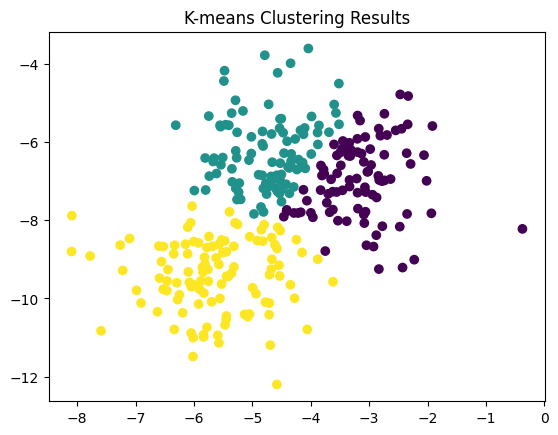

In [35]:
num_clusters = 3
kmeans_model1 = KMeans(data1, num_clusters)
predictions1 = kmeans_model1.fit(data1)

**2- K-means on Anisotropicly Distributed Dataset**

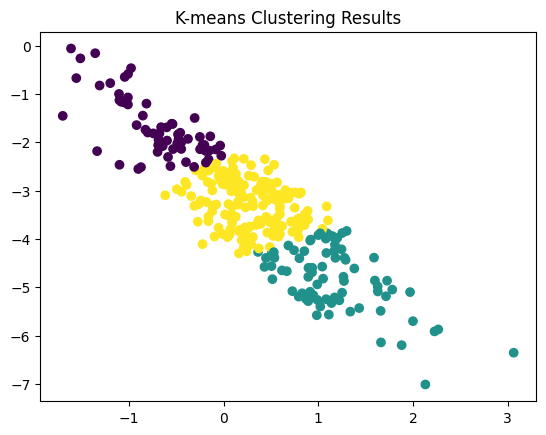

In [37]:
kmeans_model2 = KMeans(data2, num_clusters)
predictions2 = kmeans_model2.fit(data2)

**3- K-means on Noisy Moons Dataset**

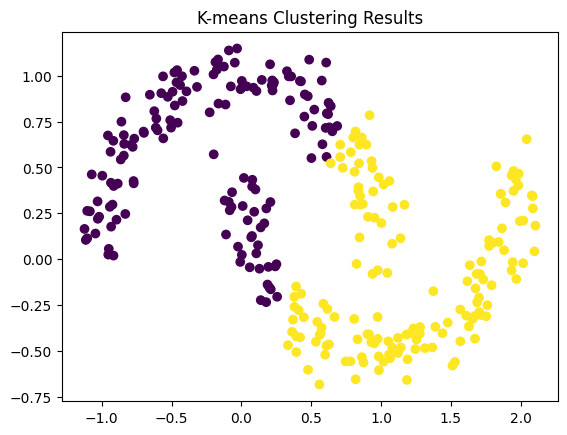

In [39]:
kmeans_model3 = KMeans(data3, 2)
predictions3 = kmeans_model3.fit(data3)

**4- K-means on Noisy circles dataset**

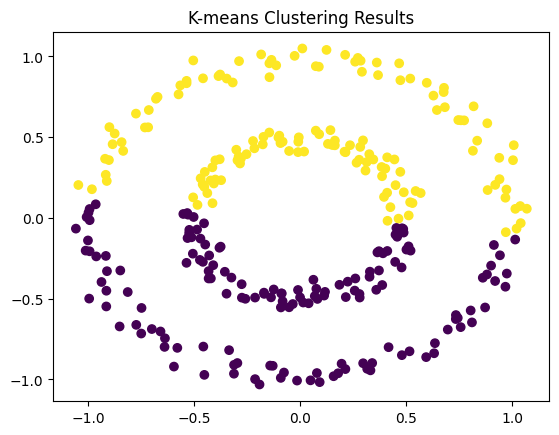

In [41]:
kmeans_model4 = KMeans(data4, 2)
predictions4 = kmeans_model4.fit(data4)

# Evaluation Metrics
We will evaluate the clustering results using the following metrics:

**F-measure:** A measure of a test's accuracy that considers both precision and recall.

**Normalized Mutual Information (NMI):** A metric for comparing the similarity between two label assignments.

**Rand Index:** A measure of the similarity between two data clusterings.

**Validation for Dataset 1**

In [44]:
f1_measure1 = f1_score(labels1, predictions1, average='macro')
print("F-measure (Dataset 1):", f1_measure1)

nmi1 = normalized_mutual_info_score(labels1, predictions1)
print("Normalized Mutual Information (Dataset 1):", nmi1)

rand_index1 = rand_score(labels1, predictions1)
print("Rand Index (Dataset 1):", rand_index1)

F-measure (Dataset 1): 0.19174482924482927
Normalized Mutual Information (Dataset 1): 0.42968302683615395
Rand Index (Dataset 1): 0.7416276477146042


**Validation for Dataset 2**

In [45]:
f1_measure2 = f1_score(labels2, predictions2, average='macro')
print("F-measure (Dataset 2):", f1_measure2)

nmi2 = normalized_mutual_info_score(labels2, predictions2)
print("Normalized Mutual Information (Dataset 2):", nmi2)

rand_index2 = rand_score(labels2, predictions2)
print("Rand Index (Dataset 2):", rand_index2)

F-measure (Dataset 2): 0.23172692234228878
Normalized Mutual Information (Dataset 2): 0.06126555200338382
Rand Index (Dataset 2): 0.5524414715719064


**Validation for Dataset 3**

In [46]:
f1_measure3 = f1_score(labels3, predictions3, average='macro')
print("F-measure (Dataset 3):", f1_measure3)

nmi3 = normalized_mutual_info_score(labels3, predictions3)
print("Normalized Mutual Information (Dataset 3):", nmi3)

rand_index3 = rand_score(labels3, predictions3)
print("Rand Index (Dataset 3):", rand_index3)

F-measure (Dataset 3): 0.7566639629329215
Normalized Mutual Information (Dataset 3): 0.19947497679971252
Rand Index (Dataset 3): 0.6305239687848383


**Validation for Dataset 4**

In [47]:
f1_measure4 = f1_score(labels4, predictions4, average='macro')
print("F-measure (Dataset 4):", f1_measure4)

nmi4 = normalized_mutual_info_score(labels4, predictions4)
print("Normalized Mutual Information (Dataset 4):", nmi4)

rand_index4 = rand_score(labels4, predictions4)
print("Rand Index (Dataset 4):", rand_index4)

F-measure (Dataset 4): 0.48994899489948995
Normalized Mutual Information (Dataset 4): 0.0002887154108155847
Rand Index (Dataset 4): 0.4985284280936455


# Summary

In [43]:
table = {
    "Dataset": ["Blobs", "Anisotropic", "Noisy Moons", "Noisy Circles"],
    "F-measure": [f1_measure1, f1_measure2, f1_measure3, f1_measure4],
    "NMI": [nmi1, nmi2, nmi3, nmi4],
    "Rand Index": [rand_index1, rand_index2, rand_index3, rand_index4]
}

df_summary = pd.DataFrame(table)
print(df_summary.to_string(index=False))


      Dataset  F-measure      NMI  Rand Index
        Blobs   0.191745 0.429683    0.741628
  Anisotropic   0.231727 0.061266    0.552441
  Noisy Moons   0.756664 0.199475    0.630524
Noisy Circles   0.489949 0.000289    0.498528
